# Step 2: Cleaning Text/Descriptive

In [94]:
#Clean up memory from any values
for name in dir():
    if not name.startswith('_'):
        del globals()[name]


import pandas as pd
#Reading data from step 1
mbti_Dataset = pd.read_csv('mbti_Dataset1.csv')

## 2-1: Removeing punctuation/URLs/Contraction and checking for emoji

In [95]:
import string
import re
import contractions
from emoji import UNICODE_EMOJI
string.punctuation

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def remove_Contraction(text):
    """Remove Contraction from the input Text"""
    return contractions.fix(text)

def remove_Numbers(text):
    """Remove Numbers from the input Text"""
    remove_digits = str.maketrans('', '', string.digits)
    return(text.translate(remove_digits))
    

def check_Emoji(text):
    """Check if text has Emoji"""
    return text in UNICODE_EMOJI['en']

def remove_Punctuation(text):
    """Remove Punctuation from the input Text"""
    """!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"""
    text_punctuated = "".join([char for char in text if char not in string.punctuation])
    return text_punctuated


mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts'].str.replace('|||', ' ', regex = False)
mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_URL(x))
mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_Contraction(x))
mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_Numbers(x))

emoji_Result = mbti_Dataset['Posts_Clean'].apply(lambda x: check_Emoji(x))
if emoji_Result.any():
    print("We have emoji on the Dataset")
else:
    print('No emoji on Dataset')

mbti_Dataset['Posts_Punctuated'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_Punctuation(x))
mbti_Dataset.head()

No emoji on Dataset


,Unnamed: 0,Type,Posts,IE,NS,FT,PJ,Posts_Clean,Posts_Punctuated
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,' enfp and intj moments sportscenter not t...,enfp and intj moments sportscenter not to...
1,1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,'I am finding the lack of me in these posts ve...,I am finding the lack of me in these posts ver...
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,"'Good one _____ Of course, to which I say ...",Good one Of course to which I say I know ...
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...
4,4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,'you are fired. that is another silly misconce...,you are fired that is another silly misconcept...


## 2-2: Tokenization

In [96]:
def tokenize_data(text):
    """Tokenizing input text"""
    tokens = re.split('\W+', text.lower())
    return tokens

mbti_Dataset['Posts_Tokenized'] = mbti_Dataset['Posts_Punctuated'].apply(lambda x: tokenize_data(x))
mbti_Dataset.head()

,Unnamed: 0,Type,Posts,IE,NS,FT,PJ,Posts_Clean,Posts_Punctuated,Posts_Tokenized
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,' enfp and intj moments sportscenter not t...,enfp and intj moments sportscenter not to...,"[, enfp, and, intj, moments, sportscenter, not..."
1,1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,'I am finding the lack of me in these posts ve...,I am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,..."
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,"'Good one _____ Of course, to which I say ...",Good one Of course to which I say I know ...,"[good, one, of, course, to, which, i, say, i, ..."
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th..."
4,4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,'you are fired. that is another silly misconce...,you are fired that is another silly misconcept...,"[you, are, fired, that, is, another, silly, mi..."


## 2-3: Remove Stopwords
Apart from removing stop words, here we also remove any extra words that might impact on our model. For example, we might remove the main category(INFP, INFJ, ...) because it was repeated multiple times in the same category and may have an impact on our prediction.

In [97]:
import nltk

def remove_Stopwords(text):
    """Removing Stops words"""
    stopwords = nltk.corpus.stopwords.words('english')
    #Adding additional words to the list of stop words to remove them
    addition_StopWords = ['infp', 'infj', 'intp', 'intj', 'entp', 'enfp', 'istp', 'isfp', 'entj', 'istj', 'enfj', 'isfj', 'estp', 'esfp', 'esfj', 'estj']
    stopwords.extend(addition_StopWords)
    text_stopwords = [word for word in text if word not in stopwords]
    return(text_stopwords)

mbti_Dataset['Posts_Stopwords'] = mbti_Dataset['Posts_Tokenized'].apply(lambda x: remove_Stopwords(x))

mbti_Dataset.head()

,Unnamed: 0,Type,Posts,IE,NS,FT,PJ,Posts_Clean,Posts_Punctuated,Posts_Tokenized,Posts_Stopwords
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,' enfp and intj moments sportscenter not t...,enfp and intj moments sportscenter not to...,"[, enfp, and, intj, moments, sportscenter, not...","[, moments, sportscenter, top, ten, plays, pra..."
1,1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,'I am finding the lack of me in these posts ve...,I am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,...","[finding, lack, posts, alarming, sex, boring, ..."
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,"'Good one _____ Of course, to which I say ...",Good one Of course to which I say I know ...,"[good, one, of, course, to, which, i, say, i, ...","[good, one, course, say, know, blessing, curse..."
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th...","[dear, enjoyed, conversation, day, esoteric, g..."
4,4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,'you are fired. that is another silly misconce...,you are fired that is another silly misconcept...,"[you, are, fired, that, is, another, silly, mi...","[fired, another, silly, misconception, approac..."


## 2-4 Stemming and Lemmatization

Adding two columns to the dataset for Stemmed and Lemmatized.

In [98]:

def stemming(text):
    """Steming the input text using Porter Stemmer from NLTK package"""
    nltk_PS = nltk.PorterStemmer()
    text_Stem = [nltk_PS.stem(word) for word in text]
    return(text_Stem)

def lemmatizing(text):
    """Lemmatizing the input text using WordNet and NLTK package"""
    NLTK_WNL = nltk.WordNetLemmatizer()
    text_Lem = [NLTK_WNL.lemmatize(word) for word in text]
    return(text_Lem)

mbti_Dataset['Posts_Stemmed'] = mbti_Dataset['Posts_Stopwords'].apply(lambda x: stemming(x))
mbti_Dataset['Posts_Lemmatized'] = mbti_Dataset['Posts_Stopwords'].apply(lambda x: lemmatizing(x))

mbti_Dataset.head()

,Unnamed: 0,Type,Posts,IE,NS,FT,PJ,Posts_Clean,Posts_Punctuated,Posts_Tokenized,Posts_Stopwords,Posts_Stemmed,Posts_Lemmatized
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,' enfp and intj moments sportscenter not t...,enfp and intj moments sportscenter not to...,"[, enfp, and, intj, moments, sportscenter, not...","[, moments, sportscenter, top, ten, plays, pra...","[, moment, sportscent, top, ten, play, prank, ...","[, moment, sportscenter, top, ten, play, prank..."
1,1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,'I am finding the lack of me in these posts ve...,I am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,...","[finding, lack, posts, alarming, sex, boring, ...","[find, lack, post, alarm, sex, bore, posit, of...","[finding, lack, post, alarming, sex, boring, p..."
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,"'Good one _____ Of course, to which I say ...",Good one Of course to which I say I know ...,"[good, one, of, course, to, which, i, say, i, ...","[good, one, course, say, know, blessing, curse...","[good, one, cours, say, know, bless, curs, abs...","[good, one, course, say, know, blessing, curse..."
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th...","[dear, enjoyed, conversation, day, esoteric, g...","[dear, enjoy, convers, day, esoter, gab, natur...","[dear, enjoyed, conversation, day, esoteric, g..."
4,4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,'you are fired. that is another silly misconce...,you are fired that is another silly misconcept...,"[you, are, fired, that, is, another, silly, mi...","[fired, another, silly, misconception, approac...","[fire, anoth, silli, misconcept, approach, log...","[fired, another, silly, misconception, approac..."


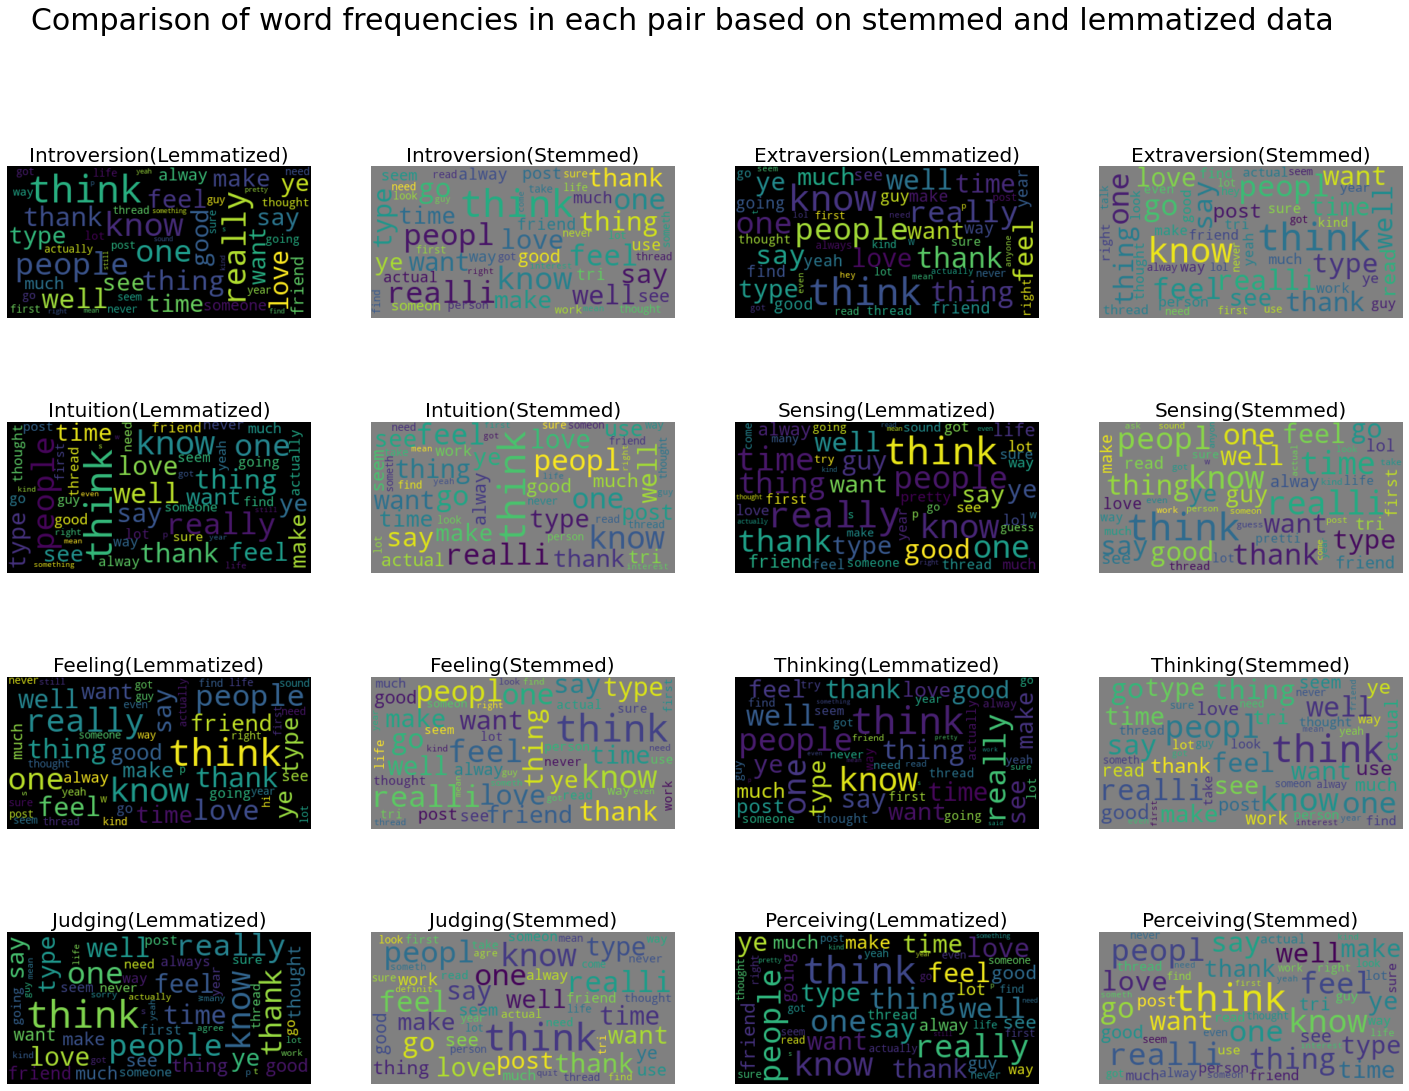

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Creating a function to Translate I,E,N,S,F,T,P,J to full word
def revert_abbreviation(text):
    '''Translate I,E,N,S,F,T,P,J to full word'''
    if text == 'I':
        return('Introversion')
    elif text == 'E':
        return('Extraversion')
    elif text == 'N':
        return('Intuition')    
    elif text == 'S':
        return('Sensing')
    elif text == 'F':
        return('Feeling')
    elif text == 'T':
        return('Thinking')
    elif text == 'P':
        return('Perceiving')
    elif text == 'J':
        return('Judging')

#WordCloud for word frequencies in each pair
classes = ['IE' , 'NS', 'FT', 'PJ']
i = 0
fig, ax = plt.subplots(figsize=(25,18))

for item in classes:
    for t in mbti_Dataset[item].unique():
        temp_Df = mbti_Dataset[mbti_Dataset[item] == t]
        WC = WordCloud(background_color="black", max_words=50, max_font_size=50).generate(temp_Df['Posts_Lemmatized'].to_string())
        plt.subplot(4,4,i+1)
        plt.title(label = revert_abbreviation(t) + '(Lemmatized)', fontsize=20)
        plt.axis("off")
        plt.imshow(WC, interpolation='bilinear')
        i+=1
        
        WC = WordCloud(background_color="gray", max_words=50, max_font_size=50).generate(temp_Df['Posts_Stemmed'].to_string())
        plt.subplot(4,4,i+1)
        plt.title(label = revert_abbreviation(t) + '(Stemmed)', fontsize=20)
        plt.axis("off")
        plt.imshow(WC, interpolation='bilinear')
        i+=1
fig.suptitle('Comparison of word frequencies in each pair based on stemmed and lemmatized data', fontsize=30)
plt.show()

Continue bulding the model using Lemmatization

In [100]:
#Saving new columns(Lemmatized, ...) into a PKL file.
mbti_Dataset.to_pickle('mbti_Dataset2.pkl')